In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import ttest_ind


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetesms/diabetes.csv


In [2]:
df = pd.read_csv(f"/kaggle/input/diabetesms/diabetes.csv",sep='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [3]:
#Age and sex are self-explanatory
#BMI is body mass index
#BP is average blood pressure
#S1 through S6 are different blood measurements
#Y is the qualitative measure of disease progression over one year

#Let's study the dataset using probability and statistics

In [4]:
#Mean and variance of all the variables

print("AGE")
mean = df['AGE'].mean()
var = df['AGE'].var()
std = df['AGE'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")
print("\nBMI")
mean = df['BMI'].mean()
var = df['BMI'].var()
std = df['BMI'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")
print("\nBP")
mean = df['BP'].mean()
var = df['BP'].var()
std = df['BP'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")
print("\nS1")
mean = df['S1'].mean()
var = df['S1'].var()
std = df['S1'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")
print("\nS2")
mean = df['S2'].mean()
var = df['S2'].var()
std = df['S2'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")
print("\nS3")
mean = df['S3'].mean()
var = df['S3'].var()
std = df['S3'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")
print("\nS4")
mean = df['S4'].mean()
var = df['S4'].var()
std = df['S4'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")
print("\nS5")
mean = df['S5'].mean()
var = df['S5'].var()
std = df['S5'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")
print("\nS6")
mean = df['S6'].mean()
var = df['S6'].var()
std = df['S6'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

AGE
Mean = 48.51809954751131
Variance = 171.84661043904742
Standard Deviation = 13.109027822041092

BMI
Mean = 26.37579185520362
Variance = 19.519798124377957
Standard Deviation = 4.4181215606157735

BP
Mean = 94.64701357466062
Variance = 191.30440103836406
Standard Deviation = 13.831283419782999

S1
Mean = 189.14027149321268
Variance = 1197.7172407424507
Standard Deviation = 34.60805167504306

S2
Mean = 115.43914027149322
Variance = 924.9554940437713
Standard Deviation = 30.413080969276546

S3
Mean = 49.78846153846154
Variance = 167.2935853828711
Standard Deviation = 12.934202154863327

S4
Mean = 4.070248868778281
Variance = 1.6652609356563137
Standard Deviation = 1.2904498966082774

S5
Mean = 4.641410859728507
Variance = 0.2728918982944973
Standard Deviation = 0.5223905610694907

S6
Mean = 91.26018099547511
Variance = 132.16571243882169
Standard Deviation = 11.496334739334172


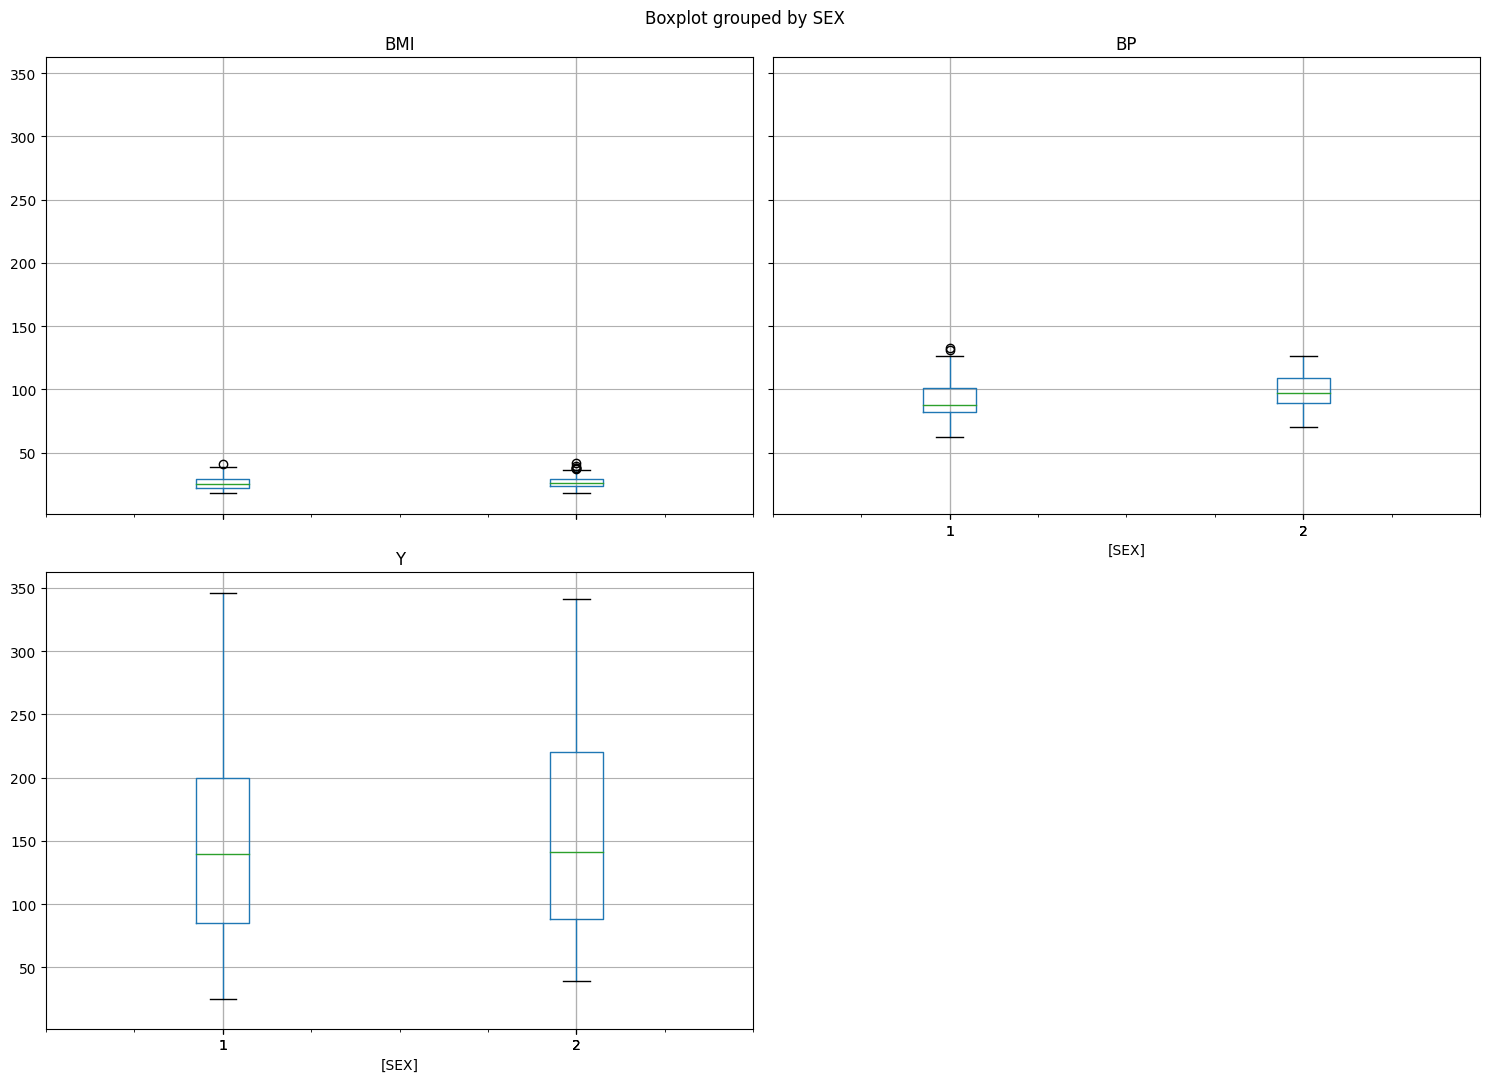

In [5]:
#Boxplots for BMI, BP, and Y depending on gender

x = df[["BMI","BP","Y","SEX"]]

x.boxplot(by='SEX', figsize=(15,11))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

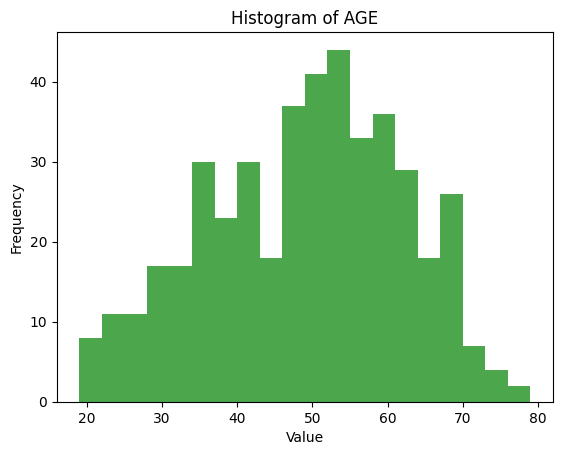

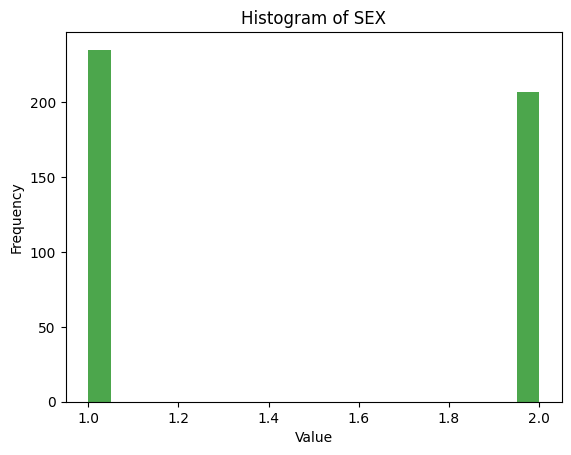

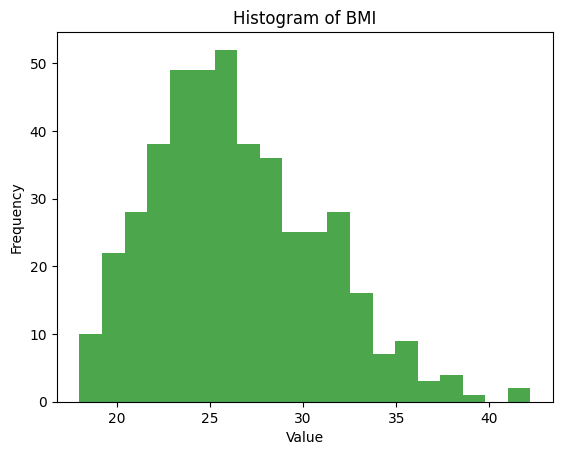

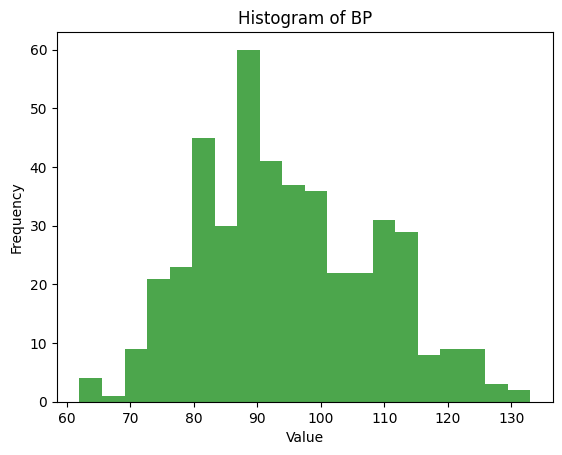

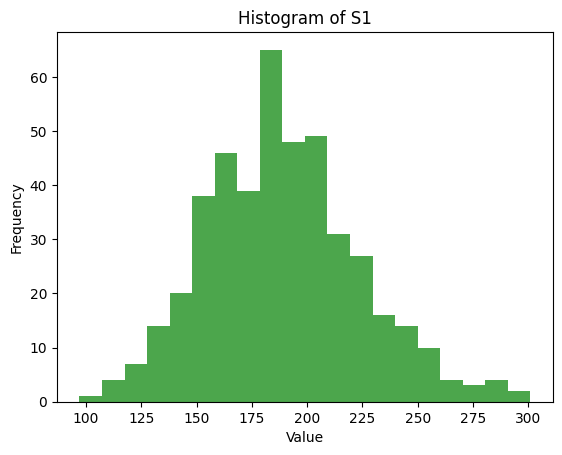

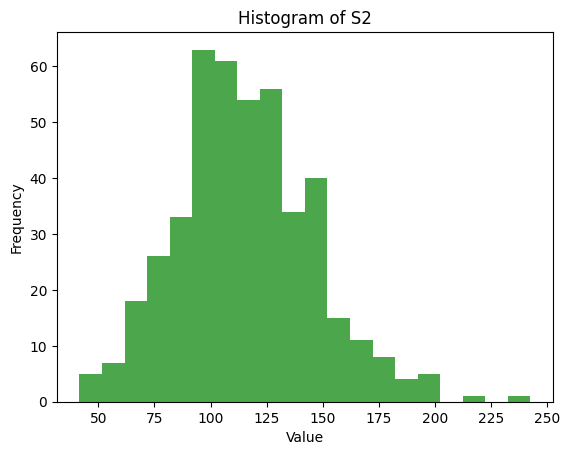

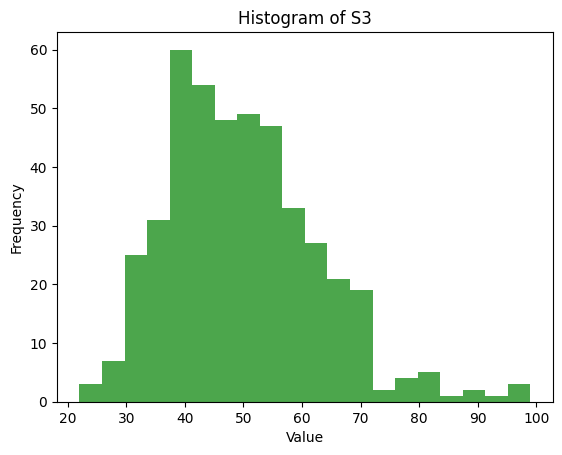

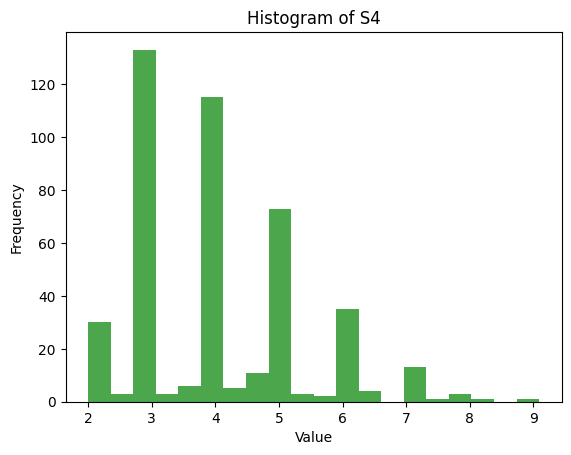

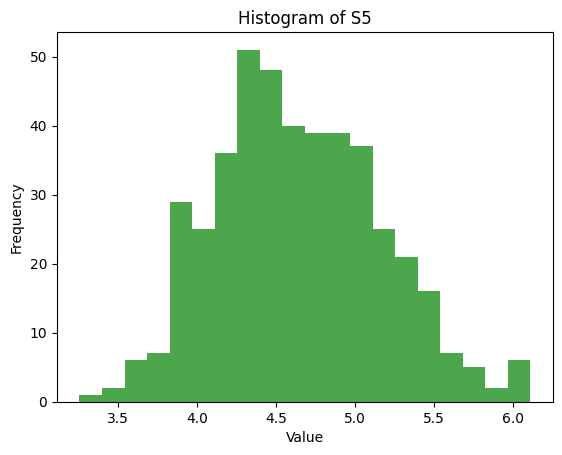

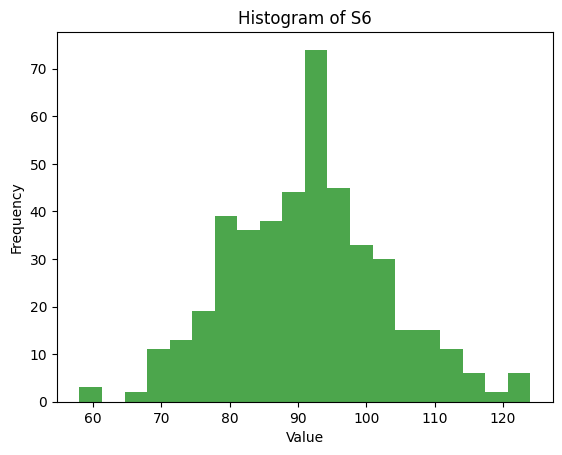

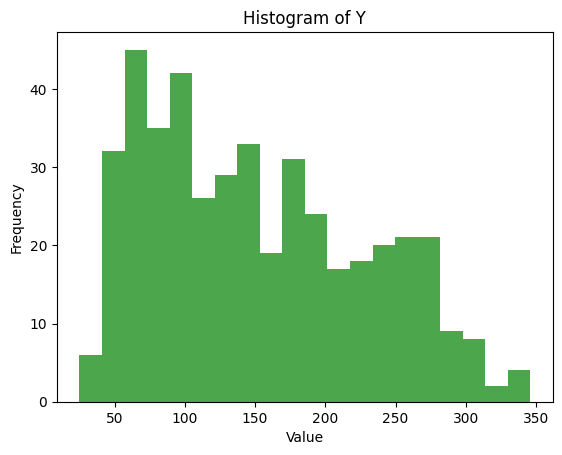

In [6]:
#the the distribution of Age, Sex, BMI and Y variables?

# Plot histograms for each column
# Create separate histograms for each column
for col in df.columns:
    plt.figure()  # Create a new figure for each histogram
    plt.hist(df[col], bins=20, color='green', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()  # Show the plot

BMI vs BP
Covariance matrix:
[[ 19.51979812  24.16288446]
 [ 24.16288446 191.30440104]]
Covariance = 24.162884456346635
Correlation = 0.39541089871771257

BMI vs Year
Covariance matrix:
[[  19.51979812  199.74859021]
 [ 199.74859021 5943.33134792]]
Covariance = 199.74859020531292
Correlation = 0.5864501344746885


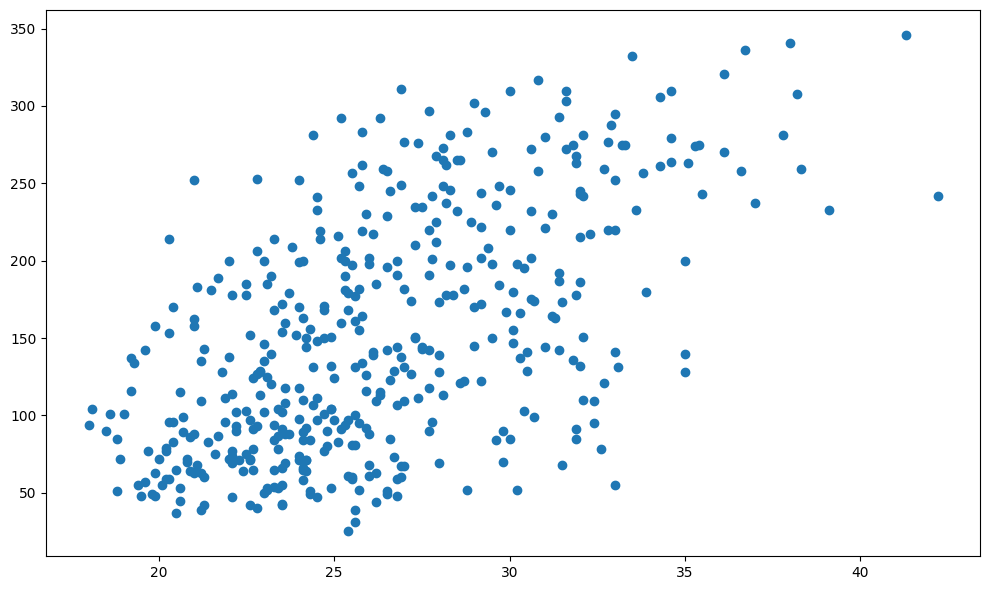


BP vs AGE
Covariance matrix:
[[191.30440104  60.81794533]
 [ 60.81794533 171.84661044]]
Covariance = 60.81794533197894
Correlation = 0.3354275870670727

BMI vs AGE
Covariance matrix:
[[ 19.51979812  10.71960015]
 [ 10.71960015 171.84661044]]
Covariance = 10.71960014775141
Correlation = 0.18508466614655544

S6 vs AGE
Covariance matrix:
[[132.16571244  45.47260443]
 [ 45.47260443 171.84661044]]
Covariance = 45.47260442638593
Correlation = 0.3017310076328378


In [7]:
#Covariance and Correlation 
print("BMI vs BP")
print(f"Covariance matrix:\n{np.cov(df['BMI'], df['BP'])}")
print(f"Covariance = {np.cov(df['BMI'], df['BP'])[0,1]}")
print(f"Correlation = {np.corrcoef(df['BMI'], df['BP'])[0,1]}")
print()
print("BMI vs Year")
print(f"Covariance matrix:\n{np.cov(df['BMI'], df['Y'])}")
print(f"Covariance = {np.cov(df['BMI'], df['Y'])[0,1]}")
print(f"Correlation = {np.corrcoef(df['BMI'], df['Y'])[0,1]}")
plt.figure(figsize=(10,6))
plt.scatter(df['BMI'], df['Y'])
plt.tight_layout()
plt.show()
print()
print("BP vs AGE")
print(f"Covariance matrix:\n{np.cov(df['BP'], df['AGE'])}")
print(f"Covariance = {np.cov(df['BP'], df['AGE'])[0,1]}")
print(f"Correlation = {np.corrcoef(df['BP'], df['AGE'])[0,1]}")
print()
print("BMI vs AGE")
print(f"Covariance matrix:\n{np.cov(df['BMI'], df['AGE'])}")
print(f"Covariance = {np.cov(df['BMI'], df['AGE'])[0,1]}")
print(f"Correlation = {np.corrcoef(df['BMI'], df['AGE'])[0,1]}")
print()
print("S6 vs AGE")
print(f"Covariance matrix:\n{np.cov(df['S6'], df['AGE'])}")
print(f"Covariance = {np.cov(df['S6'], df['AGE'])[0,1]}")
print(f"Correlation = {np.corrcoef(df['S6'], df['AGE'])[0,1]}")

In [8]:
#Testing the hypothesis that the degree of diabetes progression is different between men and women
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

print("SEXes degree of diabetes progression")
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['SEX']==1,['Y']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['SEX']==2,['Y']],p)
    print(f'Conf={p:.2f}, Men degree : {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, Women degree: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

SEXes degree of diabetes progression
Conf=0.85, Men degree : 141.87..156.17, Women degree: 147.79..163.55
Conf=0.90, Men degree : 140.84..157.20, Women degree: 146.66..164.68
Conf=0.95, Men degree : 139.27..158.78, Women degree: 144.92..166.42


In [9]:
#The degree of diabetes progression seems to be higher in women than men in all different confidence levels, however I am going to need a tight sceintific proof which is through student t-test

tval, pval = ttest_ind(df.loc[df['SEX']==1,['Y']], df.loc[df['SEX']==2,['Y']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = -0.90
P-value: 0.3674449793083975


In [10]:
# p-value is low thus proving the difference of diabetes progression between men and women